<a href="https://colab.research.google.com/github/waseda-ken/data_analyze_kikagaku/blob/main/%E6%95%99%E5%B8%AB%E3%81%AA%E3%81%97%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 教師なし学習


## 主成分分析

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# データの読み込み
from sklearn.datasets import load_iris
dataset = load_iris()
x = dataset.data
t = dataset.target
feature_names = dataset.feature_names

In [ ]:
# データの確認
pd.DataFrame(x, columns=feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#  モデルの定義
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)


In [ ]:
# モデルの学習
pca.fit(x)

PCA(n_components=2, random_state=0)

In [ ]:
# 分散の確認
pca.get_covariance()

array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

In [ ]:
# 主成分分析の適用
x_transformed = pca.transform(x)


In [ ]:
# 主成分分析適用後のデータの確認
pd.DataFrame(x_transformed, columns=['第一主成分', '第二主成分']).head(10)


,第一主成分,第二主成分
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
5,-2.280860,0.741330
6,-2.820538,-0.089461
7,-2.626145,0.163385
8,-2.886383,-0.578312
9,-2.672756,-0.113774


In [ ]:
print('第一主成分の寄与率：{}'.format(pca.explained_variance_ratio_[0]))
print('第二主成分の寄与率：{}'.format(pca.explained_variance_ratio_[1]))


第一主成分の寄与率：0.924618723201734
第二主成分の寄与率：0.05306648311706378


In [ ]:
# 0, 1, 2 の 3 つのクラスがあることを確認
np.unique(t)

array([0, 1, 2])

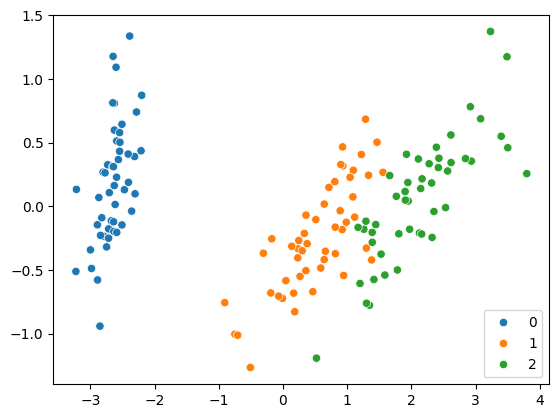

In [ ]:
# 次元削減後のデータを可視化
sns.scatterplot(x=x_transformed[:, 0], y=x_transformed[:, 1],
             hue=t, palette=sns.color_palette(n_colors=3));


## 標準化の適用

In [ ]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [ ]:
#  モデルの定義
pca = PCA(n_components=2, random_state=0)


In [ ]:
# 主成分分析の適用
x_std_transformed = pca.fit_transform(x_scaled)


In [ ]:
# 主成分分析適用後のデータの確認
pd.DataFrame(x_std_transformed, columns=['第一主成分', '第二主成分']).head(10)


,第一主成分,第二主成分
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
5,-2.075631,1.489178
6,-2.444029,0.047644
7,-2.232847,0.223148
8,-2.334640,-1.115328
9,-2.184328,-0.469014


In [ ]:
# 寄与率
print('第一主成分の寄与率：{}'.format(pca.explained_variance_ratio_[0]))
print('第二主成分の寄与率：{}'.format(pca.explained_variance_ratio_[1]))


第一主成分の寄与率：0.7296244541329991
第二主成分の寄与率：0.22850761786701745


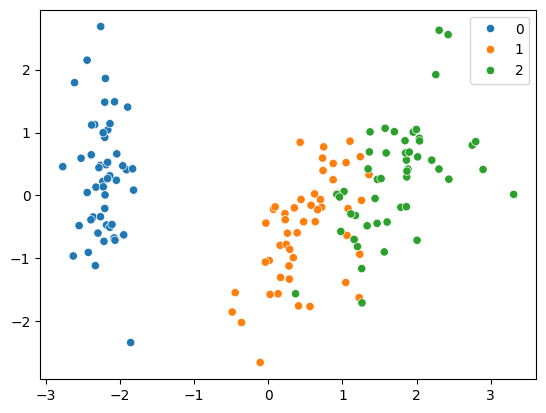

In [ ]:
# 次元削減後のデータを可視化
sns.scatterplot(x=x_std_transformed[:, 0], y=x_std_transformed[:, 1],
             hue=t, palette=sns.color_palette(n_colors=3));


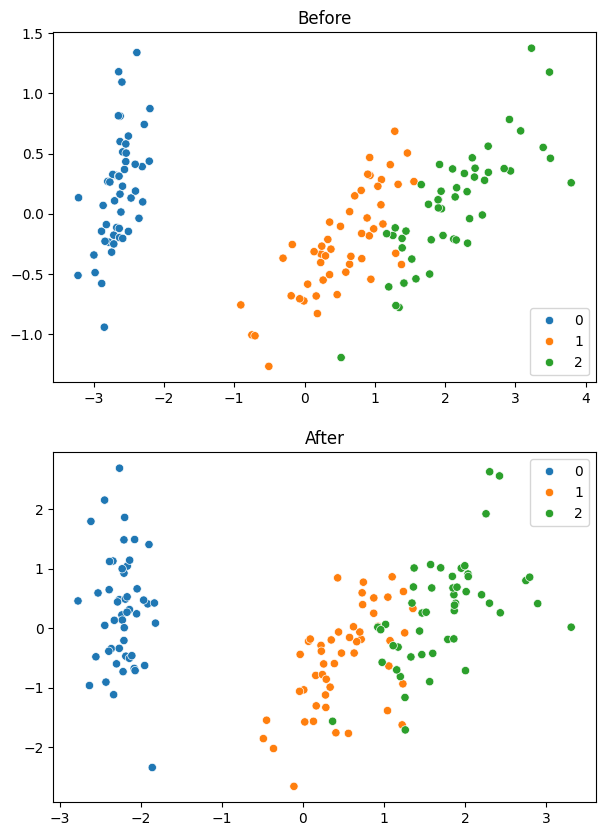

In [ ]:
fig = plt.figure(figsize=(7, 10))

# 標準化適用前
ax1 = fig.add_subplot(2, 1, 1)
sns.scatterplot(x=x_transformed[:, 0], y=x_transformed[:, 1],
             hue=t, palette=sns.color_palette(n_colors=3));
ax1.set_title('Before')

# 標準化適用後
ax2 = fig.add_subplot(2, 1, 2)
sns.scatterplot(x=x_std_transformed[:, 0], y=x_std_transformed[:, 1],
             hue=t, palette=sns.color_palette(n_colors=3));
ax2.set_title('After');

## k-平均法

人間側がクラスター（グループ）の数を決める

ランダムに振られた点（重心）から近いものをクラスターとする

紐づいたクラスターとの距離を元に重心を移動させる

In [ ]:
df = pd.read_csv('convinience_store.csv')
df.head(3)

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
0,1,25350,3650,8945,0,4867,8945
1,2,24500,0,0,1827,0,0
2,3,23050,5750,11570,0,7667,11570


In [ ]:
x = df.drop('No', axis=1).values
x[:3]

array([[25350,  3650,  8945,     0,  4867,  8945],
       [24500,     0,     0,  1827,     0,     0],
       [23050,  5750, 11570,     0,  7667, 11570]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# モデルの定義
kmeans = KMeans(n_clusters=3, random_state=0)

# モデルの学習
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# クラスターの中心座標の確認
kmeans.cluster_centers_

array([[ 4728.33333333,  3310.13333333,  7251.66666667,  2246.1       ,
         2206.66666667,  3626.1       ],
       [30490.        ,  5910.15      ,  1396.5       ,  1059.9       ,
          985.05      ,   698.35      ],
       [17602.5       ,  3342.        ,  8203.25      ,   958.6       ,
         4310.5       ,  7550.4       ]])

In [ ]:
kmeans.cluster_centers_.shape


(3, 6)

In [ ]:
# クラスタリングの適用
cluster = kmeans.predict(ｘ)
cluster

array([2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [ ]:
# データフレームの作成
df_cluster = df.copy() # データフレームをコピー
df_cluster['cluster'] = cluster

In [ ]:
df_cluster.head()


,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ,cluster
0,1,25350,3650,8945,0,4867,8945,2
1,2,24500,0,0,1827,0,0,1
2,3,23050,5750,11570,0,7667,11570,2
3,4,22850,4100,10145,0,5467,10145,2
4,5,22500,0,0,0,0,0,1


## クラスタリング結果の考察

In [ ]:
# 空のデータフレームを作成
df_results = pd.DataFrame()
df_results

""


In [ ]:
# クラスター 0 の平均値
df_cluster[df_cluster['cluster'] == 0].mean().tolist()


[38.43333333333333,
 4728.333333333333,
 3310.133333333333,
 7251.666666666667,
 2246.1,
 2206.6666666666665,
 3626.1,
 0.0]

In [ ]:
# 各クラスターの平均値を追加
df_results['cluster 0'] = df_cluster[df_cluster['cluster'] == 0].mean().tolist()
df_results['cluster 1'] = df_cluster[df_cluster['cluster'] == 1].mean().tolist()
df_results['cluster 2'] = df_cluster[df_cluster['cluster'] == 2].mean().tolist()

In [ ]:
df_results


,cluster 0,cluster 1,cluster 2
0,38.433333,53.40,13.20
1,4728.333333,30490.00,17602.50
2,3310.133333,5910.15,3342.00
3,7251.666667,1396.50,8203.25
4,2246.100000,1059.90,958.60
5,2206.666667,985.05,4310.50
6,3626.100000,698.35,7550.40
7,0.000000,1.00,2.00


In [ ]:
# Index に列名を追加
df_results = df_results.set_index(df_cluster.columns)

# 転置
df_results = df_results.drop(['No', 'cluster']).T


In [ ]:
df_results

,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
cluster 0,4728.333333,3310.133333,7251.666667,2246.1,2206.666667,3626.10
cluster 1,30490.000000,5910.150000,1396.500000,1059.9,985.050000,698.35
cluster 2,17602.500000,3342.000000,8203.250000,958.6,4310.500000,7550.40


## テスト

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# データ読み込み
df = pd.read_csv('pokemon_data.csv')

# Q2: 主成分分析による寄与率
X = df.drop('Name', axis=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca = PCA(n_components=2, random_state=0)
pca.fit(X_std)
first_ratio = pca.explained_variance_ratio_[0]
first_ratio_rounded = round(first_ratio, 2)

# Q3: KMeansクラスタリングとHPの最大値
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_std)
df['cluster'] = labels
hp_max_cluster0 = df[df['cluster'] == 0]['HP'].max()
hp_max_cluster0_rounded = int(round(hp_max_cluster0))

# 結果表示
print("Q2 第一主成分寄与率 (Rounded):", first_ratio_rounded)
print("Q3 クラスター0 の HP 最大値 (Rounded):", hp_max_cluster0_rounded)


Q2 第一主成分寄与率 (Rounded): 0.53
Q3 クラスター0 の HP 最大値 (Rounded): 255
